In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
iris = load_iris()

In [3]:
X = iris.data[:, :2]  # Use only the first two features (petal length and petal width)
y = iris.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
model = LogisticRegression(max_iter=1000, multi_class='auto')
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [6]:
predictions = model.predict(X_test)

In [7]:
accuracy = accuracy_score(y_test, predictions)

print("Accuracy: {:.2f}%".format(accuracy * 100))




Accuracy: 82.22%


In [8]:
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[19  0  0]
 [ 0  7  6]
 [ 0  2 11]]


In [9]:
class_report = classification_report(y_test, predictions)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.78      0.54      0.64        13
           2       0.65      0.85      0.73        13

    accuracy                           0.82        45
   macro avg       0.81      0.79      0.79        45
weighted avg       0.83      0.82      0.82        45



In [10]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1



In [11]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [12]:
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

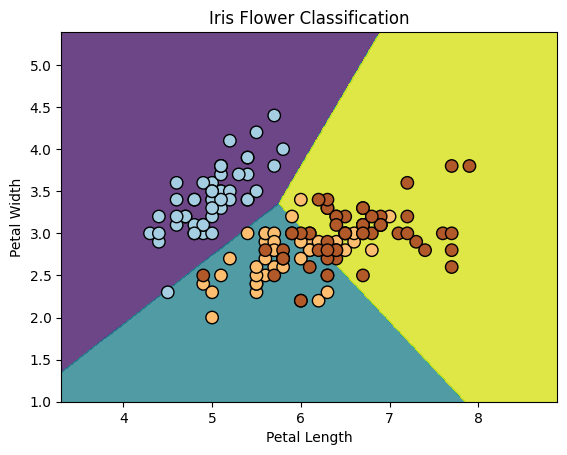

In [13]:
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=80, linewidth=1, cmap=plt.cm.Paired)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Iris Flower Classification')
plt.show()